In [ ]:
# find flood prediction start with ml steps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# using ann for flood prediction
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


c:\Users\DURGA\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### 1) Read Dataset

In [ ]:
df = pd.read_csv('Dataset/flood.csv')
df

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,7,4,7,5,9,4,6,10,4,...,7,3,8,8,6,1,5,4,2,0.535
49996,3,10,3,8,3,3,4,4,3,11,...,8,6,3,6,4,4,2,4,5,0.510
49997,4,4,5,7,2,1,4,5,6,7,...,4,6,4,1,5,1,6,4,3,0.430
49998,4,5,4,4,6,3,10,2,6,11,...,6,3,4,7,6,2,4,0,11,0.515


In [ ]:
df.shape

(50000, 21)

In [ ]:
df.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

#### Get Information about Dataset of Flood

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

### 2) Data Preprocessing

In [ ]:
df.isnull().sum()


MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [ ]:
df[df.duplicated()]

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability


#### if any columns are with datatype object

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col} : {df[col].unique()}')
    else:
        print("None")

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


### 3) Exploratory Data Analysis (EDA)

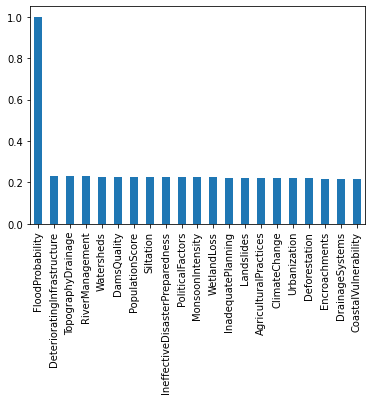

In [ ]:
# Exploratory Data Analysis (EDA)
df.corr()['FloodProbability'].sort_values(ascending=False).plot(kind='bar')
plt.show()


In [ ]:
# for the probabilities of flood prediction give one bar for each probability for 0 to 1
df['FloodProbability'].value_counts(normalize=True) * 100


FloodProbability
0.500    4.036
0.490    3.968
0.495    3.950
0.485    3.920
0.505    3.890
         ...  
0.700    0.002
0.715    0.002
0.710    0.002
0.285    0.002
0.725    0.002
Name: proportion, Length: 83, dtype: float64

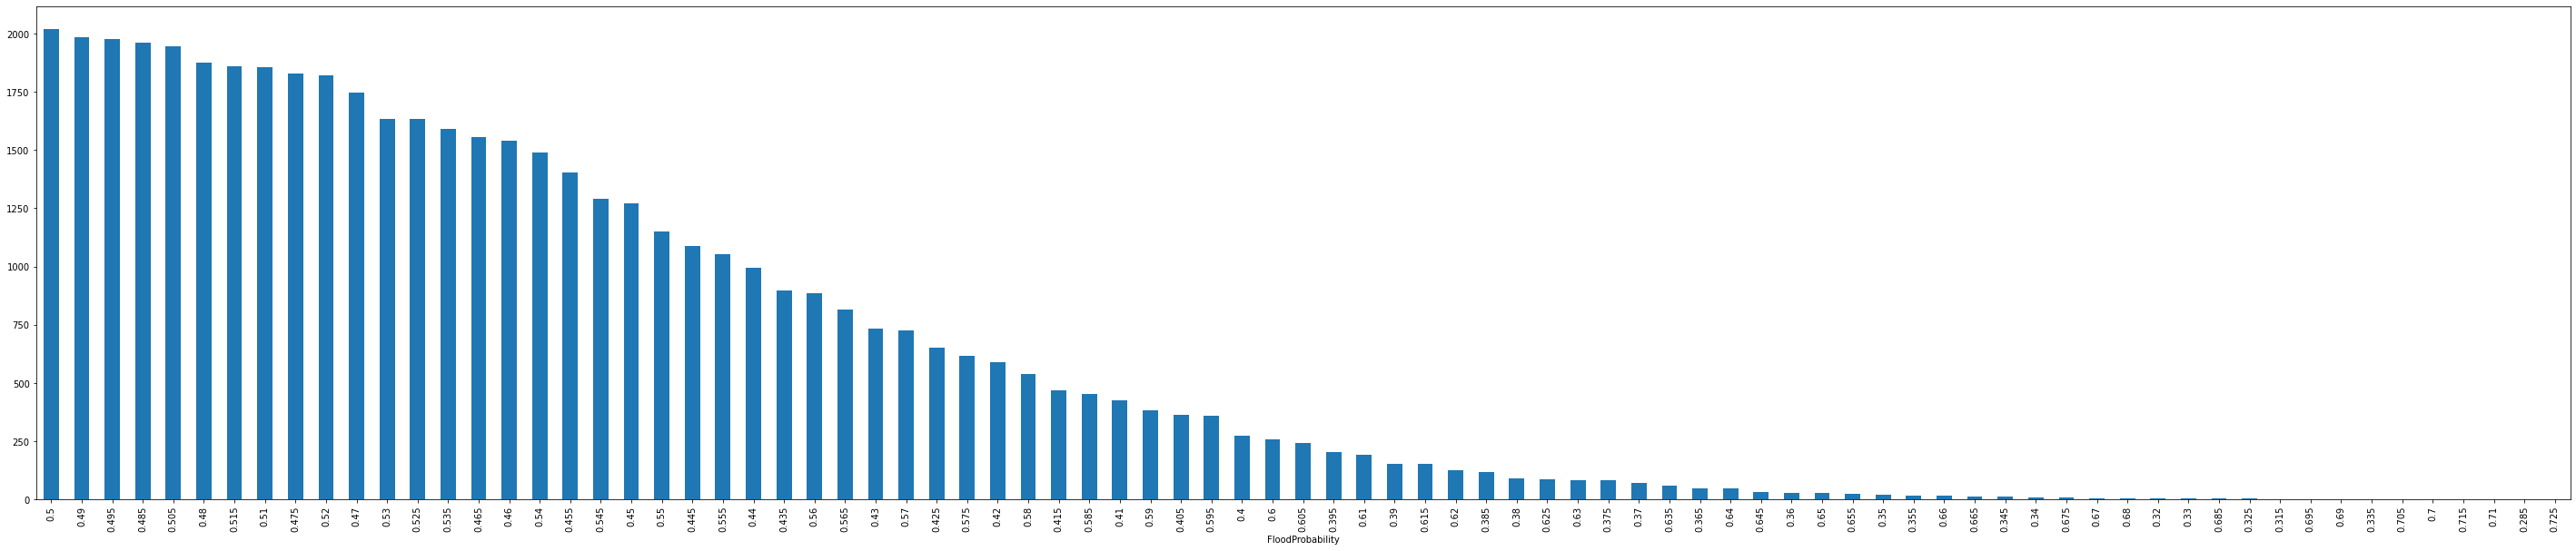

In [ ]:

# make a bar graph for this values count of flood prediction of 0 and 1
# make some space in the each bars of the graph
plt.figure(figsize=(50,10))
# make some space in the each bar graph
# plt.bar(df['FloodProbability'].value_counts().index, df['FloodProbability'].value_counts())
# plt.show()
df['FloodProbability'].value_counts().plot(kind='bar')
plt.show()


# plt.figure(figsize=(10,10))
# df['FloodProbability'].value_counts().plot(kind='bar')
# plt.show()

### 4) Data Splitting

#### Split into Features and Label

In [ ]:
Features = df.drop('FloodProbability', axis=1)
Label = df['FloodProbability']

In [ ]:
print(Features.shape)
print(Label.shape)

(50000, 20)
(50000,)


#### Split into Train and Test

In [ ]:
# Split into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, Label, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40000, 20)
(40000,)
(10000, 20)
(10000,)


### 5) Model Selection

##### Artificial Neural Network (ANN)

In [ ]:
# from keras import backend as K

# def for_epoch_accuracy(y_true, y_pred):
#     threshold = 0.1
#     return K.mean(K.cast(K.abs(y_true - y_pred) < threshold, K.floatx()))

In [ ]:
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)))

model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=1))

model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                672       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________


In [ ]:

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0240 - mean_absolute_error: 0.0690 - mean_squared_error: 0.0240 - val_loss: 0.0015 - val_mean_absolute_error: 0.0317 - val_mean_squared_error: 0.0015
Epoch 2/50
1250/1250 [==============================] - 2s 2ms/step - loss: 5.6506e-04 - mean_absolute_error: 0.0178 - mean_squared_error: 5.6506e-04 - val_loss: 2.7955e-04 - val_mean_absolute_error: 0.0129 - val_mean_squared_error: 2.7955e-04
Epoch 3/50
1250/1250 [==============================] - 2s 1ms/step - loss: 1.2622e-04 - mean_absolute_error: 0.0081 - mean_squared_error: 1.2622e-04 - val_loss: 7.6610e-05 - val_mean_absolute_error: 0.0066 - val_mean_squared_error: 7.6610e-05
Epoch 4/50
1250/1250 [==============================] - 2s 2ms/step - loss: 7.3619e-05 - mean_absolute_error: 0.0065 - mean_squared_error: 7.3619e-05 - val_loss: 1.0027e-04 - val_mean_absolute_error: 0.0089 - val_mean_squared_error: 1.0027e-04
Epoch 5/50
1250/1250 [==================

In [ ]:
model.save('model.h5')


### 6) Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)

#  MSE and MAE and Accuracy
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

value_range = np.max(y_test) - np.min(y_test)
percentage_error = (mae / value_range) * 100
accuracy = 100 - percentage_error
print(f' Accuracy: {accuracy}%')

313/313 [==============================] - 0s 894us/step
 Accuracy: 99.98104400976707%


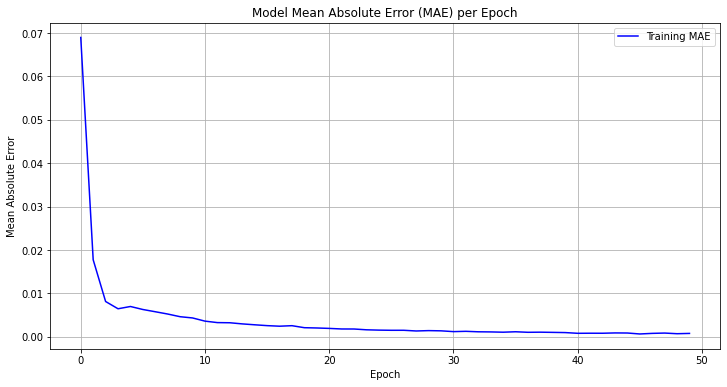

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['mean_absolute_error'], label='Training MAE', color='blue')
plt.title('Model Mean Absolute Error (MAE) per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.grid()
plt.show()


313/313 [==============================] - 0s 889us/step


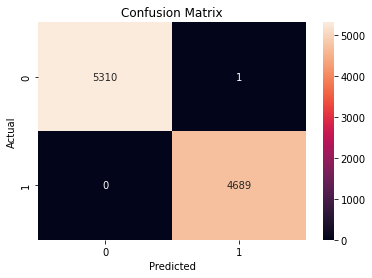

In [ ]:
# confusion matrix graph
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test.round(), y_pred.round())

sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
